In [46]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [22]:
def identify_and_plot_pulses(filename, threshold):
    # Read the CSV file, skipping the first three lines
    data = pd.read_csv(filename, skiprows=3)
    time = data.iloc[:, 0]
    detector_output = data.iloc[:, 1]

    threshold = np.max(np.abs(detector_output))/10  # Set threshold to 10% of the maximum signal amplitude

    # Identify pulses
    pulse_indices = detector_output > threshold
    pulse_starts_ends = np.diff(pulse_indices.astype(int))
    
    # Adjust pulse_starts_ends length by adding a 0 at the beginning
    pulse_starts_ends = np.insert(pulse_starts_ends, 0, 0)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(time, detector_output, label='Detector Output')
    plt.scatter(time[pulse_starts_ends == 1], detector_output[pulse_starts_ends == 1], color='green', label='Pulse Start')
    plt.scatter(time[pulse_starts_ends == -1], detector_output[pulse_starts_ends == -1], color='red', label='Pulse End')
    plt.title(f'Detector Output for {filename}')
    plt.xlabel('Time (s)')
    plt.ylabel('Detector Output (V)')
    plt.legend()
    plt.grid(True)
    plt.show()

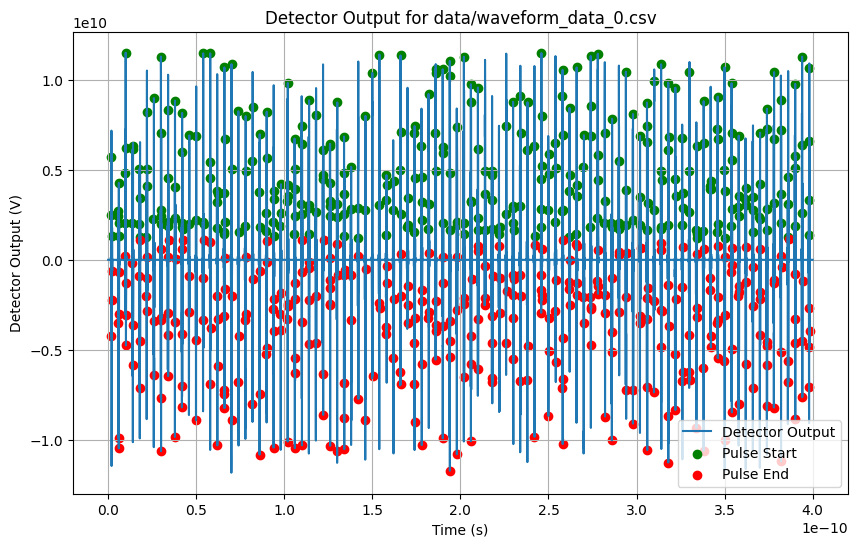

In [23]:
# Usage example
filename = 'data/waveform_data_0.csv'  # Replace with the actual path to your CSV file
threshold = 10  # Define your threshold for pulse detection
identify_and_plot_pulses(filename, threshold)

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def read_opd_from_header(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        opd_line = lines[2]  # The line containing the OPD information
        opd_value = float(opd_line.split(',')[1].strip().rstrip('.\n'))
    return opd_value

def plot_extrema_vs_opd(file_pattern, num_files, threshold=10):
    opds = []
    pulse_extrema = []

    for i in range(num_files):
        filename = file_pattern.format(i)
        opd = read_opd_from_header(filename)
        
        # Read the CSV, skipping header rows
        data = pd.read_csv(filename, skiprows=4)
        detector_output = data.iloc[:, 1]

        # Identify extrema by finding where the absolute value of the signal exceeds the threshold
        extrema_indices = np.where(np.abs(detector_output) > threshold)[0]

        # Group consecutive indices to identify separate extrema
        extrema_groups = np.split(extrema_indices, np.where(np.diff(extrema_indices) != 1)[0]+1)

        # Find the extremum value (max or min based on sign) in each group
        for group in extrema_groups:
            if len(group) > 0:  # Ensure the group is not empty
                # Determine if we're looking for a max or min in this group
                group_values = detector_output.iloc[group]
                extremum_value = group_values.max() if group_values.mean() > 0 else group_values.min()
                
                pulse_extrema.append(extremum_value)
                opds.append(opd)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(opds, pulse_extrema, color='blue', label='Extrema Values', alpha=1, s=1)
    plt.title('Extrema Values vs. Optical Path Difference')
    plt.xlabel('Optical Path Difference (m)')
    plt.ylabel('Extrema Values (V)')
    plt.legend()
    plt.grid(True)
    plt.show()


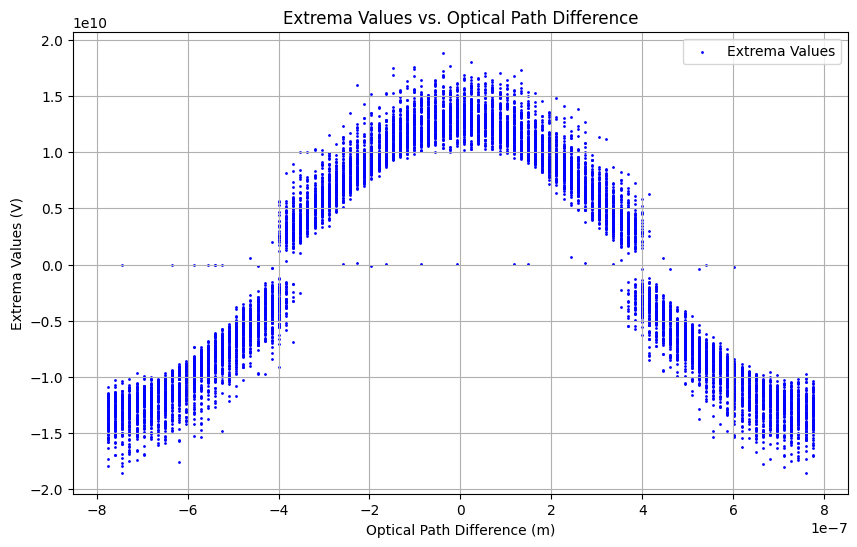

In [37]:
# Usage
file_pattern = 'data/waveform_data_{}.csv'  # Adjust the path if necessary
num_files = 100  # Total number of files
plot_extrema_vs_opd(file_pattern, num_files)